# fast.ai Lesson 1 Dogs and Cats

The intent of this notebook is to add some learning notes to original notebooks for future reference. 

It is very likely we will need GPU for our analysis, and most of notebooks do not equipment a GPU. A good option is to subscribe a cloud designed for Machine Learning or the Machine Learning as (MLaaS).

- Cloud
  - paperspace.com
  - crestle.com
  - colab.research.google.com (free, but some extra steps are needed, described below).
- MLaaS
  - AWS
  - Microsoft
  - Google Cloud
  ...


## Reference

- [Deep Learning 2: Part 1 Lesson 1](https://medium.com/@hiromi_suenaga/deep-learning-2-part-1-lesson-1-602f73869197) this is a good notes to follow. 
- [Image Classification with Convolutional Neural Networks](https://hackernoon.com/image-classification-with-convolutional-neural-networks-e2ec72130ecc) same as this one. 
- [Lesson 1: Deep Learning 2018 video](https://www.youtube.com/watch?v=IPBSB1HLNLo&feature=youtu.be&t=15m40s) listeen this with 2 above-mentioned tabs open + official class notebook + our own version notebook.

## Additional Setup for Google Colab
- Per instruction at [Fast.ai Lesson 1 on Google Colab (Free GPU)](https://towardsdatascience.com/fast-ai-lesson-1-on-google-colab-free-gpu-d2af89f53604)
- also see [Fastest way to setup Fast.ai course notebooks , for free — using Google Colab and Clouderizer](https://medium.com/@prakash_31206/fastest-way-to-setup-fast-ai-course-notebooks-for-free-using-google-colab-gpu-and-clouderizer-c8a004e1d50d)
- and see [discussion](http://forums.fast.ai/t/fast-ai-with-google-colab/18882)  

We need to add this at beginning of each notebook.

###Installing Pytorch

In [1]:
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Workaround for an issue with PIL

In [2]:
!pip install Pillow==4.1.1
!pip install PIL
!pip install image

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Installing fastai

In [3]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


###Installing libSM

The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [4]:
!apt update && apt install -y libsm6 libxext6

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Fetched 247 kB in 0s (248 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
7 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### Miscellanious  


#### Short-Cut Keys
- use tab key for code completion, and
- shift-tab for arguement list,  ** problem** [work-around](https://github.com/googlecolab/colabtools/issues/22), use alt+/  and
- hit shift-tab twice to get document of the function, and
- hit shift-tab three time to get a separate window with document to pop-up or just type a question mark (?) in front of function, and ?? to cause the source code to display.
- use ! at beginning of cell to execute bash command.

#### Connect to local drive
- [Drive FUSE](https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q)
- [External Data](https://colab.research.google.com/notebooks/io.ipynb)
- [work with fastai](http://forums.fast.ai/t/colaboratory-and-fastai/10122/7)

### Download Dataset

In [5]:
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

mkdir: cannot create directory ‘data’: File exists


## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

In [0]:
import sys
import os

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### Find out what we have

Find out whether we have GPU available. NVida's GPU library is `cuda`. 

In [10]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return True, you may want to look into why.

In [11]:
torch.backends.cudnn.enabled

True

### First take a look of the data

In [12]:
#find out current location
!pwd

/content


In [0]:
# we know where is data
PATH = "data/dogscats/"

In [0]:
sz=224

In [15]:
!ls {PATH}

models	sample	test1  tmp  train  valid


We can also get the sub-directory via os library, it returns an array.

In [16]:
subdir = os.listdir(PATH)
print(subdir)
type(subdir)

['models', 'test1', 'sample', 'tmp', 'valid', 'train']


list

In [17]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [18]:
listOfDogPics = os.listdir(f'{PATH}valid/dogs')
len(listOfDogPics)

1000

There is 1000 of dog pictures in the directory.

In [19]:
files = os.listdir(f'{PATH}valid/dogs')[0:5]
files

['dog.943.jpg',
 'dog.7131.jpg',
 'dog.11516.jpg',
 'dog.3295.jpg',
 'dog.9443.jpg']

(99, 90, 3)
(394, 309, 3)
(499, 312, 3)
(256, 360, 3)
(290, 269, 3)


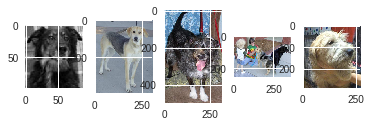

In [20]:
for i in range(0, 5): 
  plt.subplot(1, 5, i+1)
  img = plt.imread(f'{PATH}valid/dogs/{files[i]}')  # this requires pyplot
  print(img.shape)
  plt.imshow(img)

Images are not the same shape.

In [21]:
# try this with "head" and "tail"
imgFiles = !ls {PATH}valid/dogs | head
imgFiles

['dog.10001.jpg',
 'dog.10005.jpg',
 'dog.10010.jpg',
 'dog.10018.jpg',
 'dog.1001.jpg',
 'dog.10033.jpg',
 'dog.10038.jpg',
 'dog.10051.jpg',
 'dog.10063.jpg',
 'dog.10089.jpg']

data/dogscats/valid/dogs/dog.943.jpg


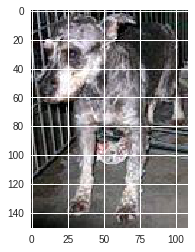

In [22]:
print(f'{PATH}valid/dogs/{files[0]}')
plt.imshow(plt.imread(f'{PATH}valid/dogs/{imgFiles[0]}'))

In [23]:
img.shape

(290, 269, 3)

In [24]:
img[:4,:4]

array([[[26, 49, 83],
        [29, 52, 86],
        [33, 56, 90],
        [33, 56, 90]],

       [[22, 42, 77],
        [26, 46, 81],
        [30, 50, 85],
        [31, 51, 86]],

       [[27, 46, 79],
        [30, 49, 82],
        [33, 52, 85],
        [33, 52, 85]],

       [[38, 55, 85],
        [40, 57, 87],
        [41, 58, 88],
        [40, 57, 87]]], dtype=uint8)

## Train a Model

In [25]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.04881    0.025575   0.989     
    1      0.041245   0.0264     0.989     



[array([0.0264]), 0.989]

We got 99% accuracy with 4 line of code and 2 epochs/loops.

Images will be transformed with  `tfms_from_model(arch, sz)` see discussion http://forums.fast.ai/t/how-sz-and-max-zoom-in-tfms-from-model-work/17484. We will need to specify the architecture and target size. 

Since we use ResNets34 as the architecture, let find out more about it. 

### Architecture 
![ResNets32](https://cdn-images-1.medium.com/max/2000/1*4tlPOipWjcwIoNUlQ6IWFQ.png)

Some implements have made and results 34-layer Resideual Network.
The building block
![building block](https://cdn-images-1.medium.com/max/2000/1*tEaVn-9OEPCre0lmHAJWyw.png)

#### Architecturee Comparsion

![cnn comparision](https://slideplayer.com/12039897/69/images/42/ResNet%3A+going+real+deep.jpg)

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

#### Understanding data

In [26]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
# try few more, to access individual picture
print(data.val_y[0], data.val_y[100])

0 0


In [28]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [29]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

We have 2000 rows with 2 columns (cat, dog) of predictions in log value.

In [30]:
log_preds[:10]

array([[ -0.00012,  -9.04353],
       [ -0.0001 ,  -9.20904],
       [ -0.00071,  -7.25298],
       [ -0.00046,  -7.68172],
       [ -0.00214,  -6.14865],
       [ -0.00005, -10.00205],
       [ -0.00004, -10.11013],
       [ -1.2567 ,  -0.3349 ],
       [ -0.00041,  -7.8088 ],
       [ -0.00021,  -8.49047]], dtype=float32)

##### Understanding argmax function

The output represents a prediction for cats, and prediction for dogs.

In [31]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1 
probs = np.exp(log_preds[:,1])        # pr(dog)
np.exp(log_preds[:,1])

array([0.00012, 0.0001 , 0.00071, ..., 0.99947, 0.99983, 1.     ], dtype=float32)

This means the first few images have near zero = cat.

In PyTorch and Fast.ai, most models return the **log** of the predictions rather than the probabilities themselves (we will learn why later in the course). For now, just know that to get probabilities, you have to do `np.exp()`.

![log](https://cdn-images-1.medium.com/max/2000/1*7upaprK7pvlI1x4SnIl9aQ.png)

In [32]:
# learn more about argmax
a1 = [1, 3, 5, 6, 7, 2]           # type = 'list'
a2 = np.array([1, 3, 5, 6, 7, 2]) # type = 'numpy.ndarray'
print(np.shape(a1),np.shape(a2))
print(type(a1),type(a2))

# list can have different type of elements
# see https://stackoverflow.com/questions/5224420/differences-between-pythons-numpy-ndarray-and-list-datatypes

(6,) (6,)
<class 'list'> <class 'numpy.ndarray'>


In [33]:
b = [[1, 3, 5, 6, 7, 2]]
np.shape(b)

(1, 6)

In [34]:
# c1 = a1.reshape(2, 3)   # would not work
c2 = a2.reshape(2, 3)     # np array can be reshaped
print(c2.shape)
c2

(2, 3)


array([[1, 3, 5],
       [6, 7, 2]])

In [35]:
# a2 = np.array([1, 3, 5, 6, 7, 2])
np.argmax(a2)  # the max value of array a2 is at index = 4, value = 7

4

In [36]:
np.argmax(a2, 0)

4

In [0]:
# np.argmax(a2, 1)
# this will not work, it is out of bound for 1 dimension array

In [38]:
# c2 = array([[1, 3, 5],
#             [6, 7, 2]])

np.argmax(c2, 0)  
# c2 is 2 dimension with shape (2, 3); 
# with axis = 0, follows first dimension, column, 
#     max in col-1 is 6, index = 1
#     max in col-2 is 7, index = 1
#     max in col-3 is 5, index = 0
# see https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax
# the shape of the return of argmax is (3)

array([1, 1, 0])

In [39]:
np.argmax(c2, 1) 
# with axis = 1, follows 2nd dimension, row, 
#     max in row-1 is 5, index = 2
#     max in row-2 is 7, index = 1

array([2, 1])

#### Plotting some results

To review the results of modeling gives us opportunity to why the model works, and where is failed. 

##### Defining some utility functions

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

##### Plotting

Correctly classified


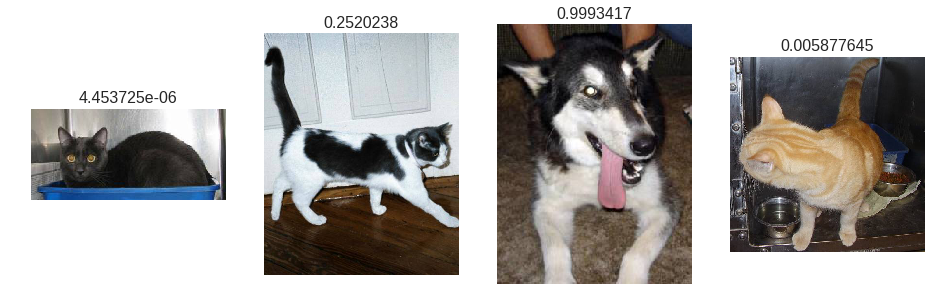

In [44]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


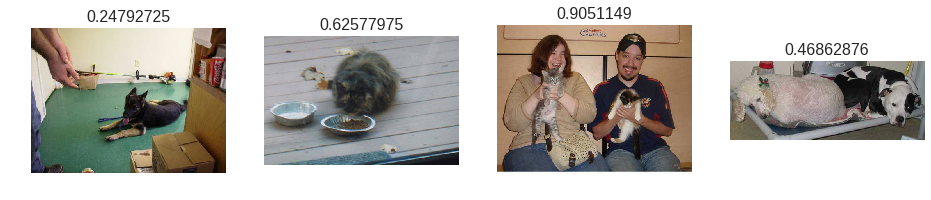

In [45]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct cats


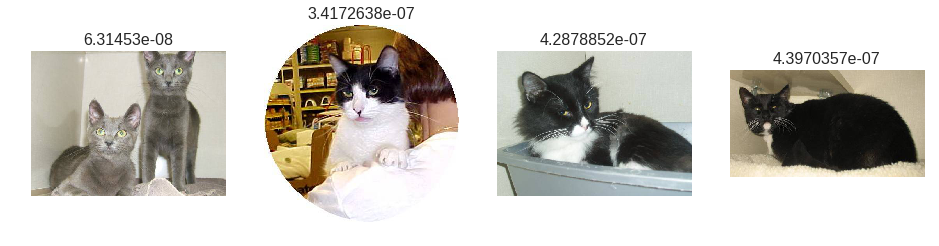

In [47]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


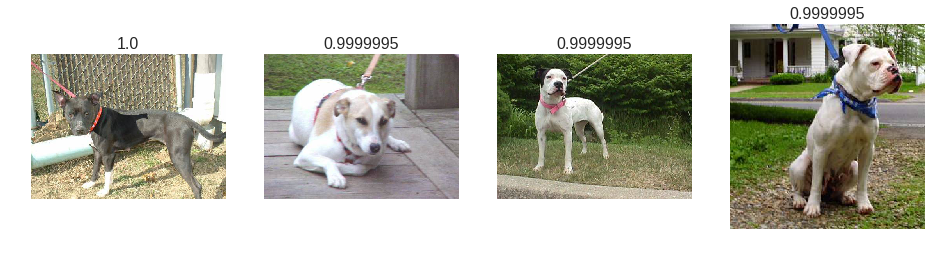

In [48]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


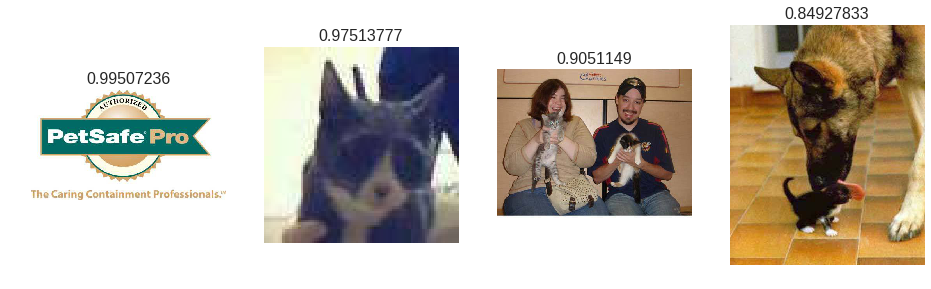

In [49]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


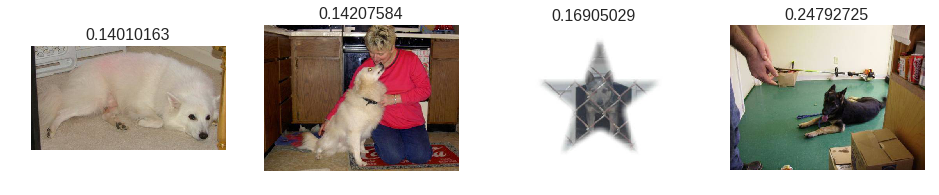

In [50]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


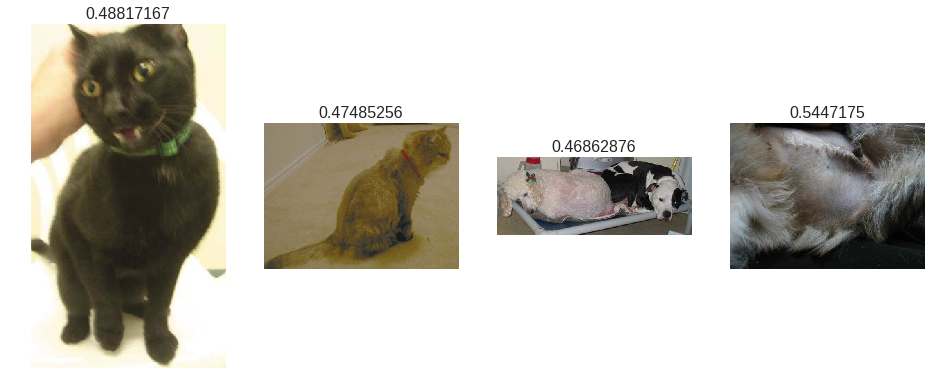

In [51]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

Learning rate is how big a change we want to make on our initial weights(parameters) for the next trial. Learning rate is very important and difficult to determine, fortunately, there is a function available to help identify the initial learning rate.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/pdf/1506.01186.pdf), where we simply keep increasing the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like

In the training model section, we defined and started training with the following code;

```
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)
```
we can try to find a good lr (learning rate), before we call `learn.fit(lr, eproch_loop)`

In [52]:
lrf=learn.lr_find()

 79%|███████▊  | 283/360 [00:06<00:01, 41.88it/s, loss=0.135]


Our learn object contains an attribute sched that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

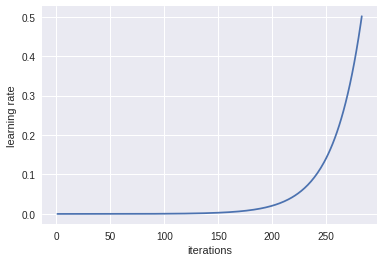

In [53]:
learn.sched.plot_lr()

We can also plot loss function vs learning rate.

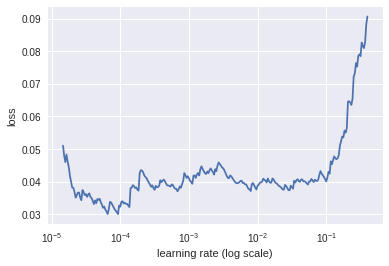

In [54]:
learn.sched.plot()

I do not know why the loss function goes higher when learning rate is larger then 0.1, it looks like it does not make any difference 0.1 thru 0.0001. 
Does this mean, our selection of 0.01 is good thing.